In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ml_total = pd.read_csv("data/final_dataset/ml_data/ml_total.csv", index_col=0)

In [3]:
ml_total

,Tract,avg_Change_Median_household_income,avg_Change_Median_home_value,avg_Change_calls_DOB,avg_Change_calls_NYPD,avg_Change_calls_DPR,avg_Change_calls_DOT,avg_Change_calls_DSNY,avg_Change_calls_TLC,avg_Change_calls_DOHMH,...,avg_Change_Total_Population_with_Bachelor_Degree_or_Higher,avg_Change_Number_of_non-Hispanic_Caucasians,avg_Change_Number_of_African_Americans,avg_Change_Number_of_American_Indians_and_Alaskans,avg_Change_No_of_non-Hispanic_Asians,avg_Change_Number_of_non-Hispanic_Hawaiians,avg_Change_No_of_non-Hispanic_others,avg_Change_No_of_non-Hispanic_multi-racials,avg_Change_No_of_Hispanics_or_Latinos,yrs_to_gentrify
GeoID,,,,,,,,,,,,,,,,,,,,,
36081024000,24000,131.947057,321.589487,100.000000,31.034483,175.000000,188.888889,0.0,200.0,166.666667,...,173.684211,34.123223,34.595745,0.000000,1132.000000,0.0,222.222222,210.937500,110.195440,2
34013004801,4801,213.574521,70.551228,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,125.000000,63.414634,94.219426,137.500000,0.000000,0.0,0.000000,0.000000,9.813084,1
36005004800,4800,64.310693,68.207307,0.000000,545.000000,36.363636,100.000000,350.0,200.0,133.333333,...,63.116883,2.397661,4450.000000,0.000000,21.788284,0.0,0.000000,0.000000,1176.250000,1
36119005702,5702,106.573759,101.091791,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,141.541353,105.161290,99.787686,160.000000,96.875000,0.0,0.000000,115.384615,112.121212,1
34013004300,4300,113.576947,133.221053,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,360.975610,0.000000,201.278772,0.000000,0.000000,0.0,0.000000,0.000000,31.250000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36061030900,30900,49.163081,96.917761,149.787435,249.734492,109.326511,50.587715,0.0,0.0,109.095669,...,151.115771,81.840661,640.577704,67.480156,15.044787,0.0,0.000000,129.714109,1329.698112,1
36081097204,97204,69.972845,62.310753,0.000000,51.399884,30.790367,102.933573,0.0,0.0,73.114852,...,34.741341,33.363498,830.030341,0.000000,45.543913,0.0,213.924751,128.770736,90.000724,1
36081024500,24500,92.715726,30.626628,0.000000,83.153264,81.467536,0.000000,0.0,0.0,0.000000,...,158.552954,269.878533,238.528194,0.000000,203.967519,0.0,0.000000,156.702953,238.946506,1


In [4]:
ml_total.drop(columns=['Tract'], inplace=True)

In [5]:
ml_total.columns = ['Median Household Income', 'Median Home Value',
       'Calls: DOB', 'Calls: NYPD', 'Calls: DPR',
       'Calls: DOT', 'Calls: DSNY', 'Calls: TLC',
       'Calls: DOHMH', 'Calls: DCA',
       'Calls: DEP', 'Calls: DOE', 'Calls: EDC',
       'Calls: DOITT', 'Calls: DFTA',
       'Total Population',
       'Total Population with Bachelor Degree or Higher',
       'No. of non-Hispanic Caucasians',
       'No. of African Americans',
       'No. of American Indians_and_Alaskans',
       'No. of non-Hispanic Asians',
       'No. of non-Hispanic Hawaiians',
       'No. of non-Hispanic others',
       'No. of non-Hispanic multi-racials',
       'No. of Hispanics or Latinos', 'Year to Gentrify']

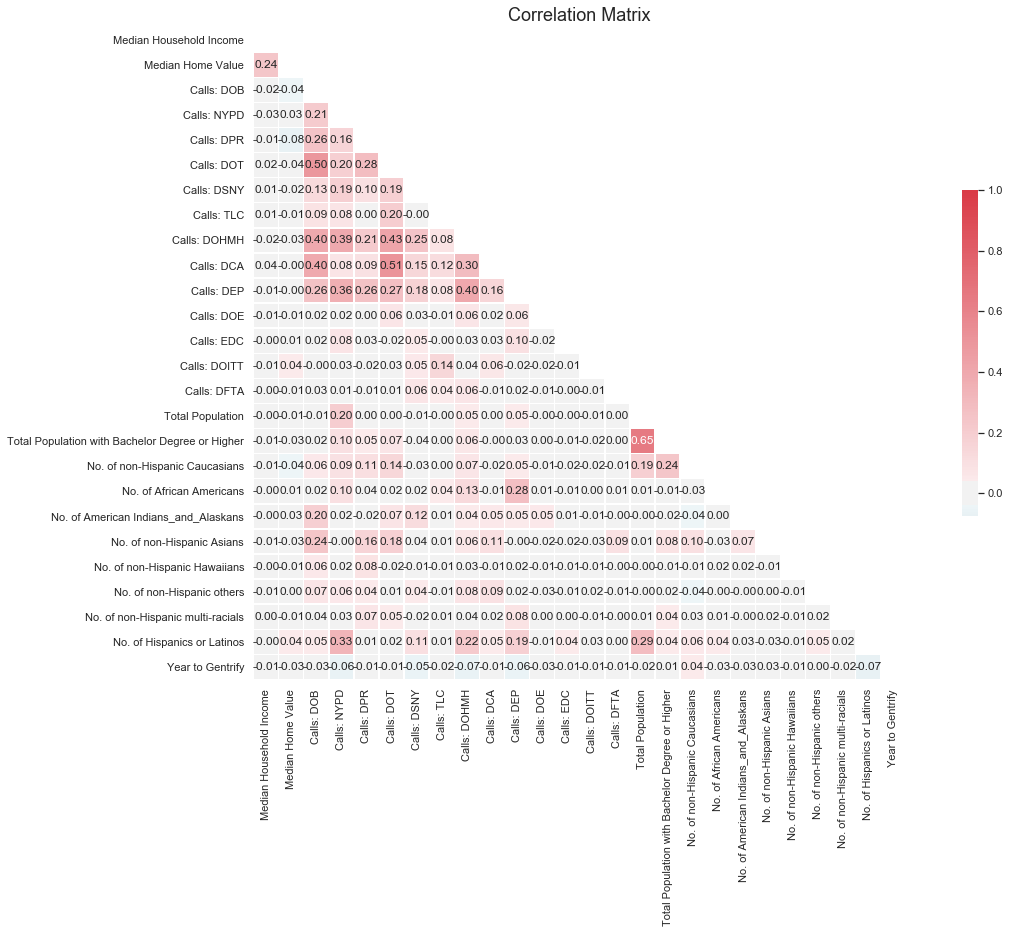

In [6]:
sns.set(style="white")

corr = ml_total.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title("Correlation Matrix" , fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True) 
plt.show()

## Build a base random forest classifier

In [7]:
X = ml_total.drop(columns = ['Year to Gentrify'])
Y = ml_total['Year to Gentrify']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)

In [9]:
print(x_train.columns)

Index(['Median Household Income', 'Median Home Value', 'Calls: DOB',
       'Calls: NYPD', 'Calls: DPR', 'Calls: DOT', 'Calls: DSNY', 'Calls: TLC',
       'Calls: DOHMH', 'Calls: DCA', 'Calls: DEP', 'Calls: DOE', 'Calls: EDC',
       'Calls: DOITT', 'Calls: DFTA', 'Total Population',
       'Total Population with Bachelor Degree or Higher',
       'No. of non-Hispanic Caucasians', 'No. of African Americans',
       'No. of American Indians_and_Alaskans', 'No. of non-Hispanic Asians',
       'No. of non-Hispanic Hawaiians', 'No. of non-Hispanic others',
       'No. of non-Hispanic multi-racials', 'No. of Hispanics or Latinos'],
      dtype='object')


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(50, 300, num = 5)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
              }

In [17]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   49.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [18]:
rf_random.best_params_

{'n_estimators': 100, 'max_depth': 237}

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def metrics(true, preds): 
    """
    Function to calculate evaluation metrics
    parameters: true values, predictions
    prints accuracy, recall, precision and f1 scores
    """
    MSE = mean_squared_error(true, preds)
    R2 = r2_score(true, preds)
    print ('MSE: {}, R2: {}'.format(MSE, R2))

In [20]:
clf = RandomForestRegressor(n_estimators= 100, max_depth = 237)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
metrics(y_test, pred)

MSE: 0.2838962813559322, R2: 0.02280482239987569


In [21]:
feat_importances = pd.DataFrame({"name":x_train.columns,"coef":clf.feature_importances_})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
0,Median Household Income,0.200339,0.200339
1,Median Home Value,0.171704,0.171704
17,No. of non-Hispanic Caucasians,0.100043,0.100043
15,Total Population,0.069187,0.069187
18,No. of African Americans,0.060017,0.060017
24,No. of Hispanics or Latinos,0.038992,0.038992
5,Calls: DOT,0.038979,0.038979
20,No. of non-Hispanic Asians,0.038976,0.038976
16,Total Population with Bachelor Degree or Higher,0.036286,0.036286
3,Calls: NYPD,0.035121,0.035121


In [27]:
feat_importances.sort_values(by=['coef'], ascending=False)

,name,coef,importances
0,Median Household Income,0.200339,0.200339
1,Median Home Value,0.171704,0.171704
17,No. of non-Hispanic Caucasians,0.100043,0.100043
15,Total Population,0.069187,0.069187
18,No. of African Americans,0.060017,0.060017
24,No. of Hispanics or Latinos,0.038992,0.038992
5,Calls: DOT,0.038979,0.038979
20,No. of non-Hispanic Asians,0.038976,0.038976
16,Total Population with Bachelor Degree or Higher,0.036286,0.036286
3,Calls: NYPD,0.035121,0.035121


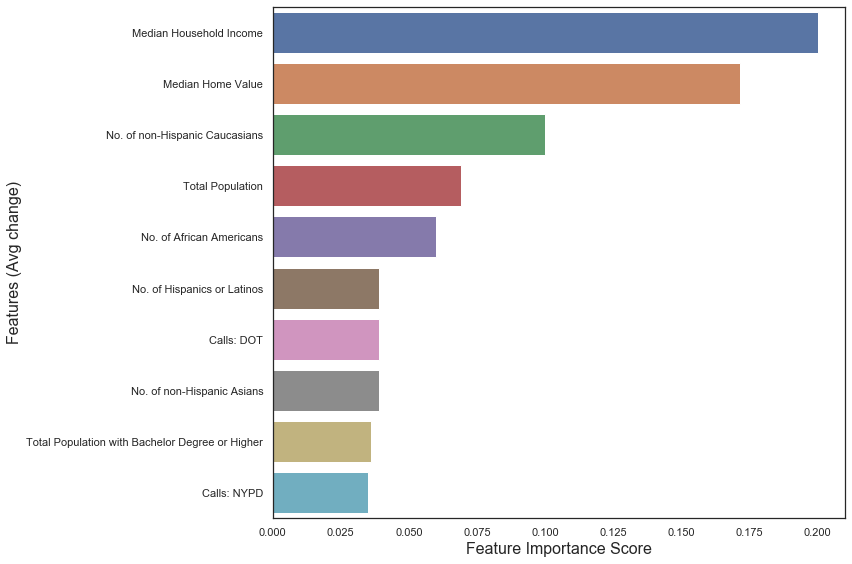

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feat_importances.head(10).iloc[:,2], y=feat_importances.head(10).iloc[:,0])
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=16)
#a.set_xscale('log')
plt.ylabel('Features (Avg change)', fontsize=16)
# plt.title("Visualizing Important Features", fontsize=20)
plt.tight_layout()
plt.savefig('./Feature_importance_score.png', dpi=400)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        yrs_to_gentrify   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              22.30
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                    1.02e-69
Time:                        02:26:16   Log-Likelihood:                         -852.01
No. Observations:                 631   AIC:                                      1754.
Df Residuals:                     606   BIC:                                      1865.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
avg_Change_Median_household_income                         -1.071e-07   5.03e-07     -0.213      0.831   -1.09e-06     8.8e-07
avg_Change_Median_home_value                                3.469e-06   1.73e-06      2.000      0.046    6.23e-08    6.88e-06
avg_Change_calls_DOB                                           0.0002      0.000      0.613      0.540      -0.000       0.001
avg_Change_calls_NYPD                                          0.0006      0.000      1.584      0.114      -0.000       0.001
avg_Change_calls_DPR                                           0.0022      0.001      3.469      0.001       0.001       0.003
avg_Change_calls_DOT                                           0.0005      0.000      1.428      0.154      -0.000       0.001
avg_Change_calls_DSNY                                          0.0005      0.000      1.647      0.100      -0.000       0.001
avg_Change_calls_TLC                                           0.0004      0.000      1.247      0.213      -0.000       0.001
avg_Change_calls_DOHMH                                         0.0002      0.000      0.655      0.513      -0.000       0.001
avg_Change_calls_DCA                                           0.0002      0.000      0.857      0.392      -0.000       0.001
avg_Change_calls_DEP                                           0.0005      0.001      1.004      0.316      -0.000       0.002
avg_Change_calls_DOE                                           0.0020      0.002      1.166      0.244      -0.001       0.005
avg_Change_calls_EDC                                           0.0031      0.006      0.528      0.598      -0.008       0.014
avg_Change_calls_DOITT                                         0.0027      0.003      0.891      0.373      -0.003       0.009
avg_Change_calls_DFTA                                          0.0006      0.010      0.066      0.948      -0.018       0.020
avg_Change_Total_Population                                   -0.0004   8.84e-05     -3.982      0.000      -0.001      -0.000
avg_Change_Total_Population_with_Bachelor_Degree_or_Higher     0.0011      0.000      5.333      0.000       0.001       0.001
avg_Change_Number_of_non-Hispanic_Caucasians                   0.0002   6.62e-05      2.543      0.011    3.83e-05       0.000
avg_Change_Number_of_African_Americans                      2.885e-05   1.59e-05      1.815      0.070   -2.37e-06    6.01e-05
avg_Change_Number_of_American_Indians_and_Alaskans          6.063e-05   8.35e-05      0.726      0.468      -0.000       0.000
avg_Change_No_of_non-Hispanic_Asians                        6.7